=== VÍ DỤ 1: SVM CLASSIFICATION ===
Dữ liệu tuyến tính: 300 mẫu, 2 features
Dữ liệu phi tuyến (circles): 300 mẫu, 2 features


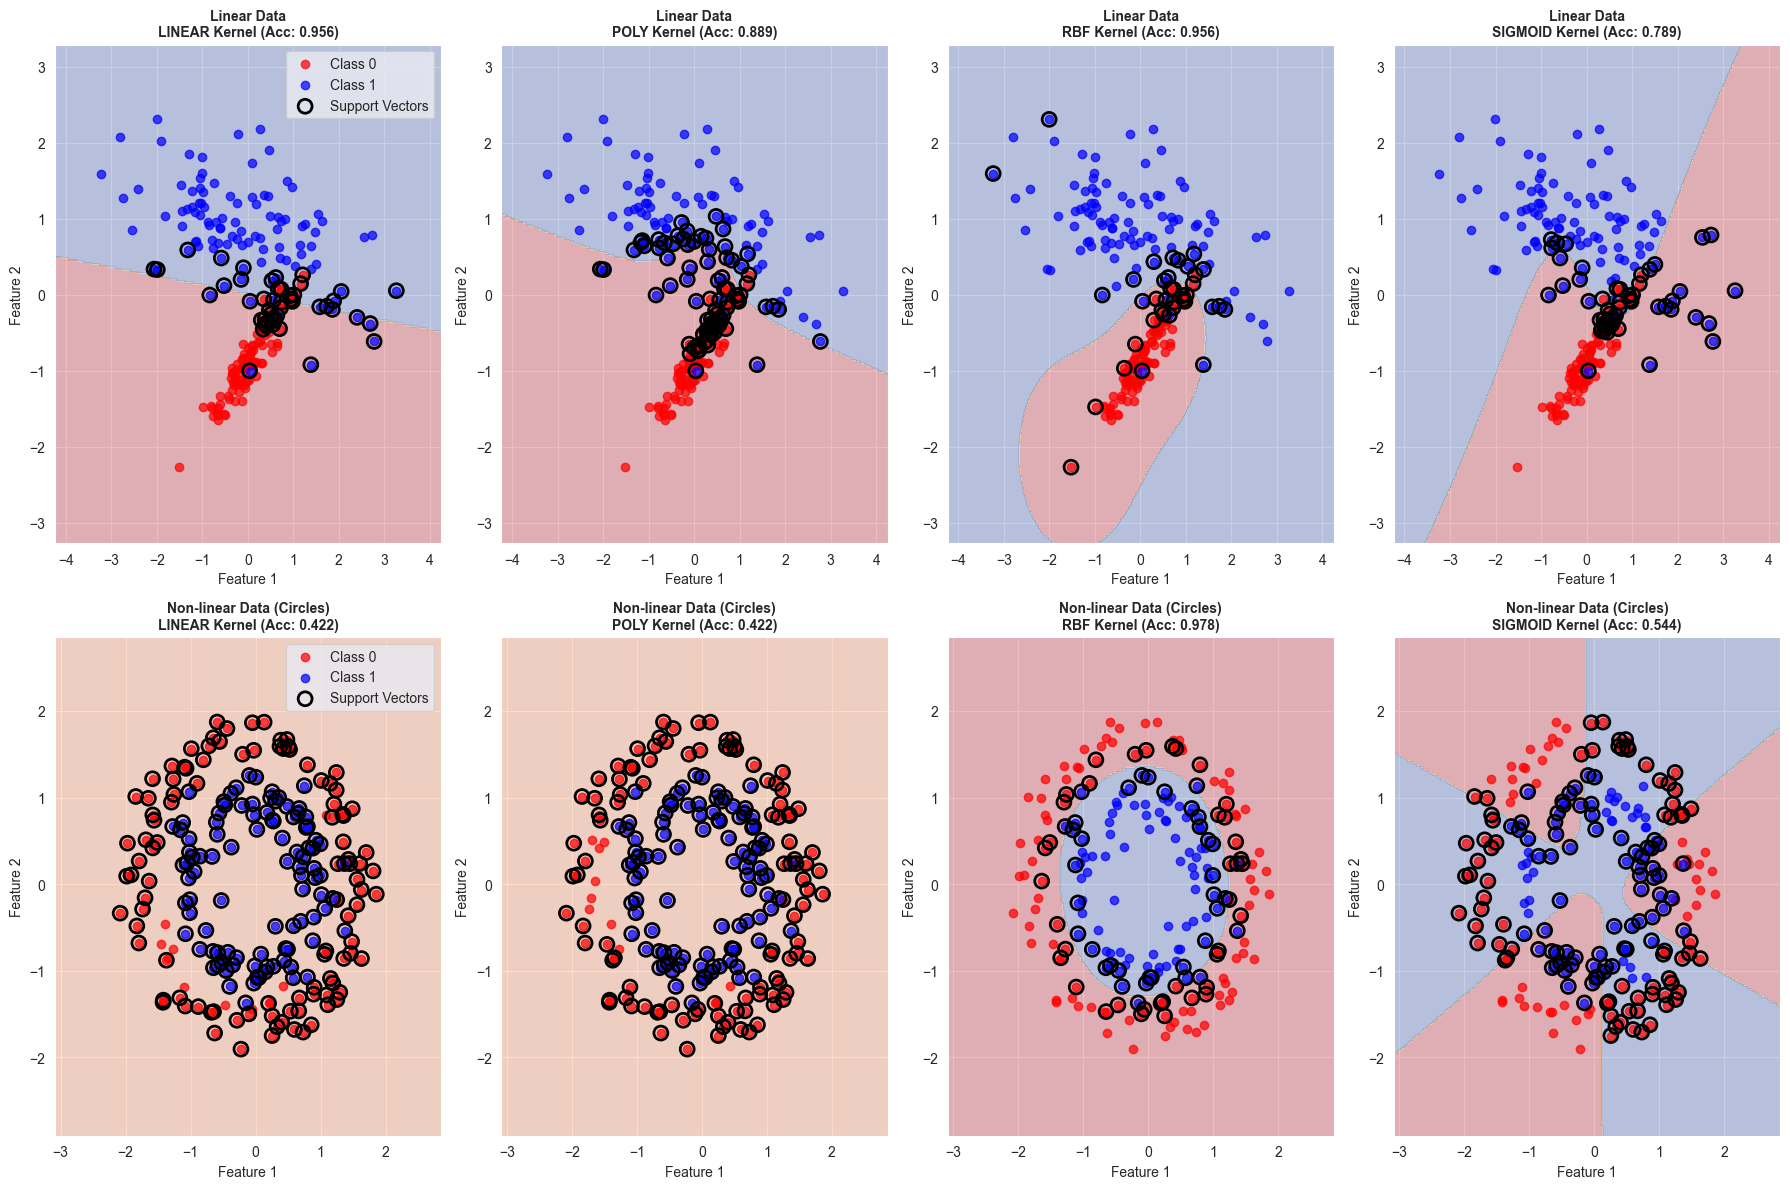


=== PHÂN TÍCH CHI TIẾT: CIRCLES DATA VỚI RBF KERNEL ===
Tham số tối ưu: {'C': 100, 'gamma': 0.1}
Accuracy tốt nhất: 0.971
Accuracy trên test set: 0.967
Số support vectors: [15 14]


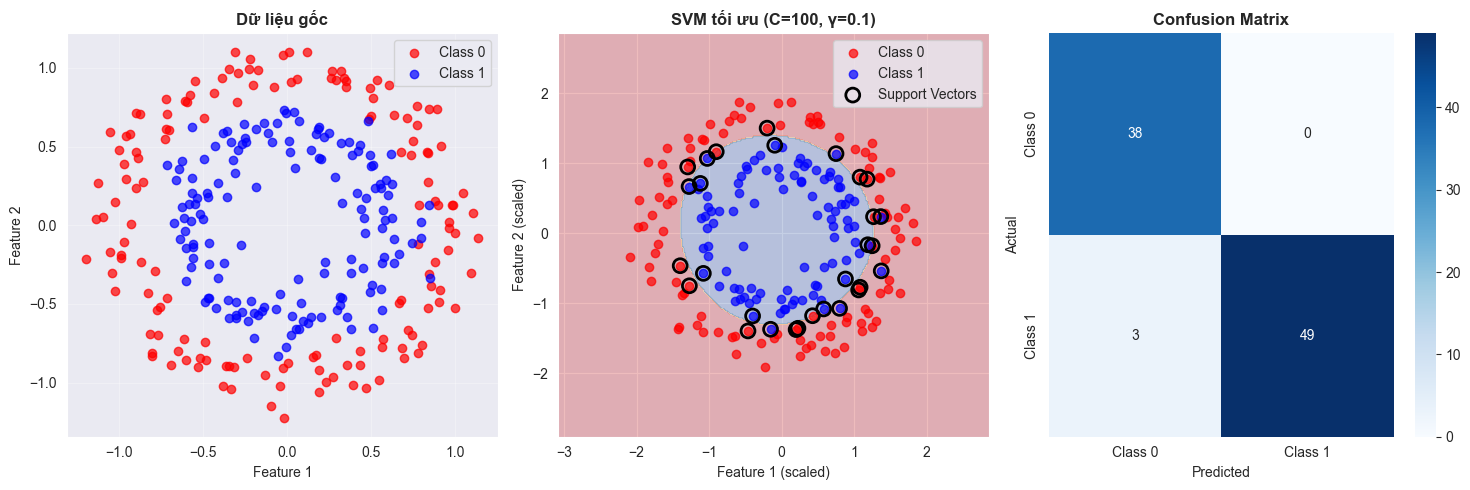


Classification Report:
              precision    recall  f1-score   support

     Class 0       0.93      1.00      0.96        38
     Class 1       1.00      0.94      0.97        52

    accuracy                           0.97        90
   macro avg       0.96      0.97      0.97        90
weighted avg       0.97      0.97      0.97        90



In [5]:
# ============== VÍ DỤ 1: SVM CLASSIFICATION VỚI DỮ LIỆU SINH NGẪU NHIÊN ==============
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_classification, make_circles
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.preprocessing import StandardScaler
import seaborn as sns

# Tạo dữ liệu phân loại tuyến tính
np.random.seed(42)
X_linear, y_linear = make_classification(
    n_samples=300,
    n_features=2,
    n_redundant=0,
    n_informative=2,
    n_clusters_per_class=1,
    n_classes=2,
    random_state=42
)

# Tạo dữ liệu phân loại phi tuyến (circles)
X_circles, y_circles = make_circles(
    n_samples=300,
    noise=0.1,
    factor=0.6,
    random_state=42
)

print("=== VÍ DỤ 1: SVM CLASSIFICATION ===")
print(f"Dữ liệu tuyến tính: {X_linear.shape[0]} mẫu, {X_linear.shape[1]} features")
print(f"Dữ liệu phi tuyến (circles): {X_circles.shape[0]} mẫu, {X_circles.shape[1]} features")

# Chuẩn bị dữ liệu
datasets = [
    (X_linear, y_linear, "Linear Data"),
    (X_circles, y_circles, "Non-linear Data (Circles)")
]

plt.figure(figsize=(18, 12))
subplot_idx = 1

for X, y, title in datasets:
    # Chia dữ liệu train/test
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

    # Chuẩn hóa dữ liệu
    scaler = StandardScaler()
    X_train_scaled = scaler.fit_transform(X_train)
    X_test_scaled = scaler.transform(X_test)

    # Thử nghiệm với các kernel khác nhau
    kernels = ['linear', 'poly', 'rbf', 'sigmoid']
    colors = ['red', 'blue']

    for i, kernel in enumerate(kernels):
        plt.subplot(2, 4, subplot_idx)

        # Huấn luyện SVM với kernel cụ thể
        if kernel == 'poly':
            svm = SVC(kernel=kernel, degree=3, random_state=42)
        else:
            svm = SVC(kernel=kernel, random_state=42)

        svm.fit(X_train_scaled, y_train)
        y_pred = svm.predict(X_test_scaled)
        accuracy = accuracy_score(y_test, y_pred)

        # Vẽ decision boundary
        h = 0.02
        x_min, x_max = X_train_scaled[:, 0].min() - 1, X_train_scaled[:, 0].max() + 1
        y_min, y_max = X_train_scaled[:, 1].min() - 1, X_train_scaled[:, 1].max() + 1
        xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))

        Z = svm.predict(np.c_[xx.ravel(), yy.ravel()])
        Z = Z.reshape(xx.shape)

        plt.contourf(xx, yy, Z, alpha=0.3, cmap=plt.cm.RdYlBu)

        # Vẽ dữ liệu
        for class_idx in range(2):
            mask = y_train == class_idx
            plt.scatter(X_train_scaled[mask, 0], X_train_scaled[mask, 1],
                       c=colors[class_idx], label=f'Class {class_idx}', alpha=0.7)

        # Vẽ support vectors
        plt.scatter(svm.support_vectors_[:, 0], svm.support_vectors_[:, 1],
                   s=100, facecolors='none', edgecolors='black', linewidth=2, label='Support Vectors')

        plt.title(f'{title}\n{kernel.upper()} Kernel (Acc: {accuracy:.3f})',
                 fontsize=10, fontweight='bold')
        plt.xlabel('Feature 1')
        plt.ylabel('Feature 2')
        if i == 0:
            plt.legend()

        subplot_idx += 1

plt.tight_layout()
plt.show()

# Phân tích chi tiết cho dữ liệu circles với RBF kernel
print(f"\n=== PHÂN TÍCH CHI TIẾT: CIRCLES DATA VỚI RBF KERNEL ===")
X_train, X_test, y_train, y_test = train_test_split(X_circles, y_circles, test_size=0.3, random_state=42)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Grid search để tìm tham số tối ưu
param_grid = {
    'C': [0.1, 1, 10, 100],
    'gamma': ['scale', 'auto', 0.001, 0.01, 0.1, 1]
}

svm_grid = SVC(kernel='rbf', random_state=42)
# Fix: Remove n_jobs=-1 to avoid file system issues on Windows
grid_search = GridSearchCV(svm_grid, param_grid, cv=5, scoring='accuracy', n_jobs=1)
grid_search.fit(X_train_scaled, y_train)

best_svm = grid_search.best_estimator_
y_pred = best_svm.predict(X_test_scaled)

print(f"Tham số tối ưu: {grid_search.best_params_}")
print(f"Accuracy tốt nhất: {grid_search.best_score_:.3f}")
print(f"Accuracy trên test set: {accuracy_score(y_test, y_pred):.3f}")
print(f"Số support vectors: {best_svm.n_support_}")

# Visualize kết quả tối ưu
plt.figure(figsize=(15, 5))

# Subplot 1: Dữ liệu gốc
plt.subplot(1, 3, 1)
for class_idx in range(2):
    mask = y_circles == class_idx
    plt.scatter(X_circles[mask, 0], X_circles[mask, 1],
               c=colors[class_idx], label=f'Class {class_idx}', alpha=0.7)
plt.title('Dữ liệu gốc', fontsize=12, fontweight='bold')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.legend()
plt.grid(True, alpha=0.3)

# Subplot 2: Kết quả tối ưu
plt.subplot(1, 3, 2)
h = 0.02
x_min, x_max = X_train_scaled[:, 0].min() - 1, X_train_scaled[:, 0].max() + 1
y_min, y_max = X_train_scaled[:, 1].min() - 1, X_train_scaled[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))

Z = best_svm.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

plt.contourf(xx, yy, Z, alpha=0.3, cmap=plt.cm.RdYlBu)
for class_idx in range(2):
    mask = y_train == class_idx
    plt.scatter(X_train_scaled[mask, 0], X_train_scaled[mask, 1],
               c=colors[class_idx], label=f'Class {class_idx}', alpha=0.7)

plt.scatter(best_svm.support_vectors_[:, 0], best_svm.support_vectors_[:, 1],
           s=100, facecolors='none', edgecolors='black', linewidth=2, label='Support Vectors')
plt.title(f'SVM tối ưu (C={grid_search.best_params_["C"]}, γ={grid_search.best_params_["gamma"]})',
         fontsize=12, fontweight='bold')
plt.xlabel('Feature 1 (scaled)')
plt.ylabel('Feature 2 (scaled)')
plt.legend()

# Subplot 3: Confusion Matrix
plt.subplot(1, 3, 3)
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Class 0', 'Class 1'],
            yticklabels=['Class 0', 'Class 1'])
plt.title('Confusion Matrix', fontsize=12, fontweight='bold')
plt.xlabel('Predicted')
plt.ylabel('Actual')

plt.tight_layout()
plt.show()

print("\nClassification Report:")
print(classification_report(y_test, y_pred, target_names=['Class 0', 'Class 1']))


=== VÍ DỤ 2: SVM REGRESSION - DỰ ĐOÁN GIÁ NHÀ ===
Dataset nhà đất:
     DienTich  SoPhongNgu  SoTang    TuoiNha  KhoangCachTrungTam  \
0  114.901425           3       3   6.808512           23.979493   
1   95.852071           4       1   4.904493           10.609848   
2  119.430656           1       5  10.016087           10.437191   
3  145.690896           3       3  12.169131           40.000000   
4   92.975399           2       2   0.043728           16.963008   

   DanhGiaTienIch Quan    LoaiNha  GanTruongHoc  GanBenhVien        GiaBan  
0        2.864726   Q3  Nha_cap_4             0            1  12029.901203  
1        1.759745   Q1    Nha_pho             0            0  18149.016574  
2        3.806953   Q1   Chung_cu             0            0  16358.044662  
3        3.225859   Q7   Chung_cu             1            0  13866.655693  
4        2.434486   Q7   Biet_thu             1            0  20463.967240  

Số mẫu: 800
Thống kê giá bán:
count      800.000000
mean     

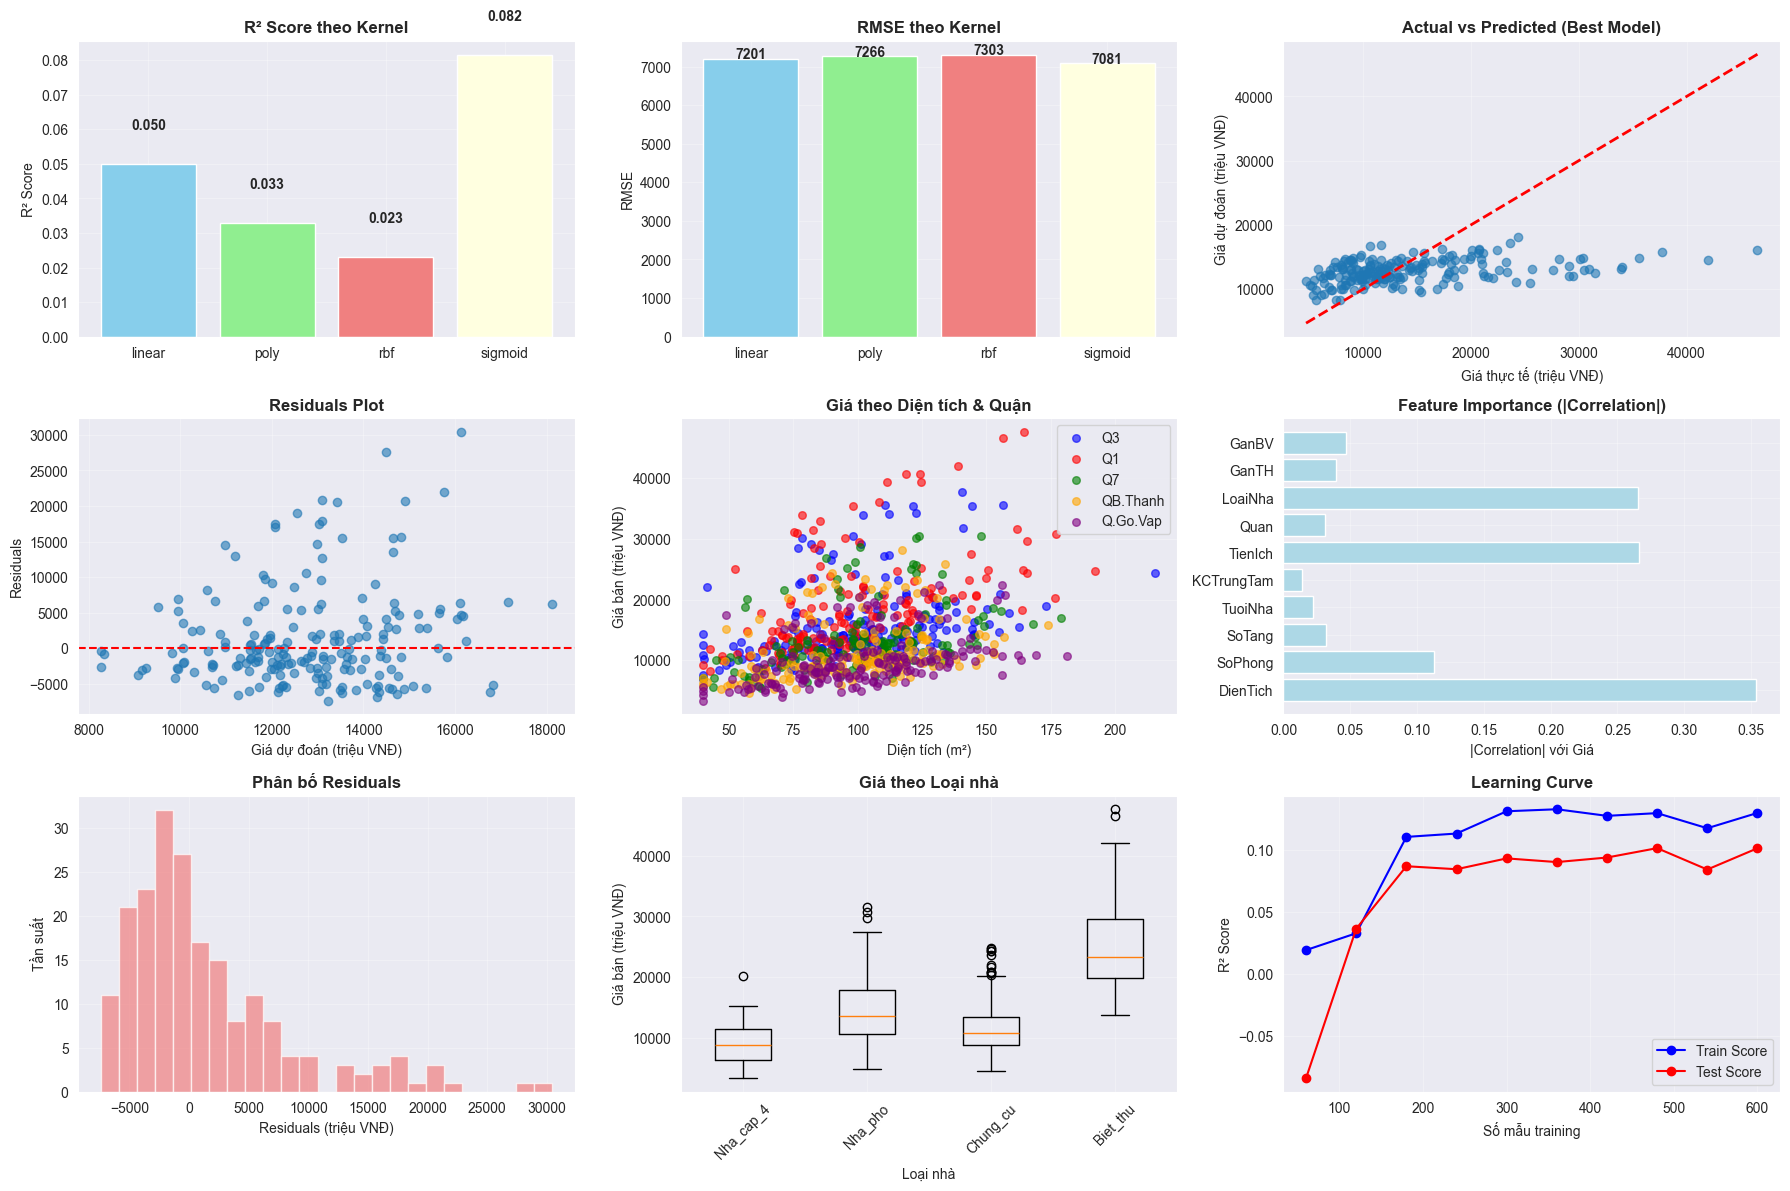


=== BÁO CÁO KẾT QUẢ SVM REGRESSION ===
Kernel tốt nhất: SIGMOID
Tham số tối ưu: {'C': 200, 'epsilon': 0.01}
R² Score: 0.101
RMSE: 7003.60 triệu VNĐ
MAE: 4824.48 triệu VNĐ
Số support vectors: [600]

=== VÍ DỤ DỰ ĐOÁN CỤ THỂ ===

Nhà 1:
  Thực tế: 9742 triệu VNĐ
  Dự đoán: 11634 triệu VNĐ
  Sai số: 1892 triệu VNĐ (19.4%)
  Chi tiết: 123m², 2 phòng, 2 tầng, Q7, Biet_thu

Nhà 2:
  Thực tế: 14313 triệu VNĐ
  Dự đoán: 13367 triệu VNĐ
  Sai số: 945 triệu VNĐ (6.6%)
  Chi tiết: 72m², 3 phòng, 4 tầng, Q7, Chung_cu

Nhà 3:
  Thực tế: 5125 triệu VNĐ
  Dự đoán: 10733 triệu VNĐ
  Sai số: 5607 triệu VNĐ (109.4%)
  Chi tiết: 126m², 4 phòng, 3 tầng, Q.Go.Vap, Chung_cu

Nhà 4:
  Thực tế: 9340 triệu VNĐ
  Dự đoán: 13208 triệu VNĐ
  Sai số: 3868 triệu VNĐ (41.4%)
  Chi tiết: 141m², 3 phòng, 3 tầng, Q3, Biet_thu

Nhà 5:
  Thực tế: 8344 triệu VNĐ
  Dự đoán: 11499 triệu VNĐ
  Sai số: 3155 triệu VNĐ (37.8%)
  Chi tiết: 112m², 3 phòng, 5 tầng, Q7, Chung_cu

=== SO SÁNH VỚI LINEAR REGRESSION ===
SVM R² Score:

In [7]:
# ============== VÍ DỤ 2: SVM REGRESSION VỚI DỮ LIỆU THỰC TẾ ==============
import pandas as pd
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
from sklearn.preprocessing import LabelEncoder

# Tạo dữ liệu giá nhà phức tạp
np.random.seed(42)
n_samples = 800

# Tạo dữ liệu với nhiều yếu tố ảnh hưởng
data = {
    'DienTich': np.random.normal(100, 30, n_samples),  # m2
    'SoPhongNgu': np.random.choice([1, 2, 3, 4, 5], n_samples, p=[0.05, 0.25, 0.4, 0.25, 0.05]),
    'SoTang': np.random.choice([1, 2, 3, 4, 5], n_samples, p=[0.3, 0.3, 0.25, 0.1, 0.05]),
    'TuoiNha': np.random.exponential(10, n_samples),  # năm
    'KhoangCachTrungTam': np.random.exponential(12, n_samples),  # km
    'DanhGiaTienIch': np.random.uniform(1, 5, n_samples),  # 1-5 scale
    'Quan': np.random.choice(['Q1', 'Q3', 'Q7', 'QB.Thanh', 'Q.Go.Vap'], n_samples),
    'LoaiNha': np.random.choice(['Chung_cu', 'Nha_pho', 'Biet_thu', 'Nha_cap_4'],
                               n_samples, p=[0.5, 0.25, 0.15, 0.1]),
    'GanTruongHoc': np.random.choice([0, 1], n_samples, p=[0.6, 0.4]),  # Binary
    'GanBenhVien': np.random.choice([0, 1], n_samples, p=[0.7, 0.3])   # Binary
}

# Giới hạn các giá trị hợp lý
data['DienTich'] = np.clip(data['DienTich'], 40, 300)
data['TuoiNha'] = np.clip(data['TuoiNha'], 0, 50)
data['KhoangCachTrungTam'] = np.clip(data['KhoangCachTrungTam'], 1, 40)

# Tạo công thức tính giá phức tạp và phi tuyến
quan_multiplier = {'Q1': 2.0, 'Q3': 1.7, 'Q7': 1.4, 'QB.Thanh': 1.2, 'Q.Go.Vap': 1.0}
loai_multiplier = {'Chung_cu': 1.0, 'Nha_pho': 1.3, 'Biet_thu': 2.2, 'Nha_cap_4': 0.8}

gia_ban = []
for i in range(n_samples):
    # Công thức phi tuyến phức tạp
    gia_co_ban = (
        data['DienTich'][i] * 45 +                           # Tuyến tính với diện tích
        data['SoPhongNgu'][i] ** 1.5 * 180 +                # Phi tuyến với số phòng
        data['SoTang'][i] * 120 +                           # Tuyến tính với số tầng
        np.exp(-data['TuoiNha'][i] / 20) * 800 +            # Exponential decay với tuổi nhà
        1 / (1 + data['KhoangCachTrungTam'][i] * 0.1) * 600 +  # Inverse với khoảng cách
        data['DanhGiaTienIch'][i] ** 2 * 100 +              # Quadratic với tiện ích
        data['GanTruongHoc'][i] * 300 +                     # Bonus gần trường
        data['GanBenhVien'][i] * 200                        # Bonus gần bệnh viện
    )

    # Áp dụng multiplier
    gia_final = (gia_co_ban *
                quan_multiplier[data['Quan'][i]] *
                loai_multiplier[data['LoaiNha'][i]])

    # Thêm nhiễu
    gia_final += np.random.normal(0, 300)

    # Đảm bảo giá tối thiểu
    gia_ban.append(max(1500, gia_final))

data['GiaBan'] = gia_ban

# Tạo DataFrame
df = pd.DataFrame(data)

print("=== VÍ DỤ 2: SVM REGRESSION - DỰ ĐOÁN GIÁ NHÀ ===")
print("Dataset nhà đất:")
print(df.head())
print(f"\nSố mẫu: {len(df)}")
print(f"Thống kê giá bán:")
print(df['GiaBan'].describe())

# Preprocessing
le_quan = LabelEncoder()
le_loai = LabelEncoder()
df['Quan_encoded'] = le_quan.fit_transform(df['Quan'])
df['LoaiNha_encoded'] = le_loai.fit_transform(df['LoaiNha'])

# Chuẩn bị features
features = ['DienTich', 'SoPhongNgu', 'SoTang', 'TuoiNha', 'KhoangCachTrungTam',
           'DanhGiaTienIch', 'Quan_encoded', 'LoaiNha_encoded', 'GanTruongHoc', 'GanBenhVien']
X = df[features].values
y = df['GiaBan'].values

print(f"\nFeatures: {features}")

# Chia dữ liệu
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

# Chuẩn hóa
scaler_X = StandardScaler()
X_train_scaled = scaler_X.fit_transform(X_train)
X_test_scaled = scaler_X.transform(X_test)

print(f"\nTrain samples: {X_train.shape[0]}")
print(f"Test samples: {X_test.shape[0]}")

# Thử nghiệm với các kernel khác nhau
kernels = ['linear', 'poly', 'rbf', 'sigmoid']
svr_results = {}

for kernel in kernels:
    print(f"\n--- Testing {kernel.upper()} kernel ---")

    if kernel == 'poly':
        svr = SVR(kernel=kernel, degree=3, C=100, epsilon=0.1)
    elif kernel == 'rbf':
        svr = SVR(kernel=kernel, C=100, gamma='scale', epsilon=0.1)
    else:
        svr = SVR(kernel=kernel, C=100, epsilon=0.1)

    svr.fit(X_train_scaled, y_train)
    y_pred = svr.predict(X_test_scaled)

    r2 = r2_score(y_test, y_pred)
    mse = mean_squared_error(y_test, y_pred)
    rmse = np.sqrt(mse)
    mae = mean_absolute_error(y_test, y_pred)

    svr_results[kernel] = {
        'model': svr,
        'predictions': y_pred,
        'r2': r2,
        'mse': mse,
        'rmse': rmse,
        'mae': mae
    }

    print(f"R² Score: {r2:.3f}")
    print(f"RMSE: {rmse:.2f}")
    print(f"MAE: {mae:.2f}")

# Tìm kernel tốt nhất
best_kernel = max(svr_results.keys(), key=lambda k: svr_results[k]['r2'])
print(f"\n=== KERNEL TỐT NHẤT: {best_kernel.upper()} ===")
print(f"R² Score: {svr_results[best_kernel]['r2']:.3f}")

# Grid Search cho kernel tốt nhất
print(f"\n=== GRID SEARCH CHO {best_kernel.upper()} KERNEL ===")
if best_kernel == 'rbf':
    param_grid = {
        'C': [10, 50, 100, 200],
        'gamma': ['scale', 'auto', 0.01, 0.1],
        'epsilon': [0.01, 0.1, 0.2]
    }
elif best_kernel == 'poly':
    param_grid = {
        'C': [10, 50, 100, 200],
        'degree': [2, 3, 4],
        'epsilon': [0.01, 0.1, 0.2]
    }
else:
    param_grid = {
        'C': [10, 50, 100, 200],
        'epsilon': [0.01, 0.1, 0.2]
    }

svr_grid = SVR(kernel=best_kernel)
# Fix: Remove n_jobs=-1 to avoid file system issues on Windows
grid_search = GridSearchCV(svr_grid, param_grid, cv=5, scoring='r2', n_jobs=1)
grid_search.fit(X_train_scaled, y_train)

best_svr = grid_search.best_estimator_
y_pred_best = best_svr.predict(X_test_scaled)

print(f"Tham số tối ưu: {grid_search.best_params_}")
print(f"R² Score (CV): {grid_search.best_score_:.3f}")
print(f"R² Score (Test): {r2_score(y_test, y_pred_best):.3f}")

# Visualizations
plt.figure(figsize=(18, 12))

# Subplot 1: So sánh các kernel
plt.subplot(3, 3, 1)
kernel_names = list(svr_results.keys())
r2_scores = [svr_results[k]['r2'] for k in kernel_names]
bars = plt.bar(kernel_names, r2_scores, color=['skyblue', 'lightgreen', 'lightcoral', 'lightyellow'])
plt.title('R² Score theo Kernel', fontsize=12, fontweight='bold')
plt.ylabel('R² Score')
plt.grid(True, alpha=0.3)
for i, v in enumerate(r2_scores):
    plt.text(i, v + 0.01, f'{v:.3f}', ha='center', fontweight='bold')

# Subplot 2: RMSE theo kernel
plt.subplot(3, 3, 2)
rmse_scores = [svr_results[k]['rmse'] for k in kernel_names]
plt.bar(kernel_names, rmse_scores, color=['skyblue', 'lightgreen', 'lightcoral', 'lightyellow'])
plt.title('RMSE theo Kernel', fontsize=12, fontweight='bold')
plt.ylabel('RMSE')
plt.grid(True, alpha=0.3)
for i, v in enumerate(rmse_scores):
    plt.text(i, v + 10, f'{v:.0f}', ha='center', fontweight='bold')

# Subplot 3: Actual vs Predicted (best model)
plt.subplot(3, 3, 3)
plt.scatter(y_test, y_pred_best, alpha=0.6)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)
plt.title('Actual vs Predicted (Best Model)', fontsize=12, fontweight='bold')
plt.xlabel('Giá thực tế (triệu VNĐ)')
plt.ylabel('Giá dự đoán (triệu VNĐ)')
plt.grid(True, alpha=0.3)

# Subplot 4: Residuals
plt.subplot(3, 3, 4)
residuals = y_test - y_pred_best
plt.scatter(y_pred_best, residuals, alpha=0.6)
plt.axhline(y=0, color='r', linestyle='--')
plt.title('Residuals Plot', fontsize=12, fontweight='bold')
plt.xlabel('Giá dự đoán (triệu VNĐ)')
plt.ylabel('Residuals')
plt.grid(True, alpha=0.3)

# Subplot 5: Phân bố giá theo quận
plt.subplot(3, 3, 5)
quan_colors = {'Q1': 'red', 'Q3': 'blue', 'Q7': 'green', 'QB.Thanh': 'orange', 'Q.Go.Vap': 'purple'}
for quan in df['Quan'].unique():
    mask = df['Quan'] == quan
    plt.scatter(df[mask]['DienTich'], df[mask]['GiaBan'],
               c=quan_colors[quan], label=quan, alpha=0.6, s=30)
plt.title('Giá theo Diện tích & Quận', fontsize=12, fontweight='bold')
plt.xlabel('Diện tích (m²)')
plt.ylabel('Giá bán (triệu VNĐ)')
plt.legend()
plt.grid(True, alpha=0.3)

# Subplot 6: Feature importance (correlation)
plt.subplot(3, 3, 6)
correlations = []
feature_names_short = ['DienTich', 'SoPhong', 'SoTang', 'TuoiNha', 'KCTrungTam',
                      'TienIch', 'Quan', 'LoaiNha', 'GanTH', 'GanBV']
for i, feature in enumerate(features):
    corr = np.corrcoef(X[:, i], y)[0, 1]
    correlations.append(abs(corr))

bars = plt.barh(range(len(correlations)), correlations, color='lightblue')
plt.title('Feature Importance (|Correlation|)', fontsize=12, fontweight='bold')
plt.xlabel('|Correlation| với Giá')
plt.yticks(range(len(feature_names_short)), feature_names_short)
plt.grid(True, alpha=0.3)

# Subplot 7: Phân bố residuals
plt.subplot(3, 3, 7)
plt.hist(residuals, bins=25, alpha=0.7, color='lightcoral')
plt.title('Phân bố Residuals', fontsize=12, fontweight='bold')
plt.xlabel('Residuals (triệu VNĐ)')
plt.ylabel('Tần suất')
plt.grid(True, alpha=0.3)

# Subplot 8: Giá theo loại nhà
plt.subplot(3, 3, 8)
loai_data = [df[df['LoaiNha'] == loai]['GiaBan'].values for loai in df['LoaiNha'].unique()]
# Fix: Use tick_labels instead of deprecated labels parameter
plt.boxplot(loai_data, tick_labels=df['LoaiNha'].unique())
plt.title('Giá theo Loại nhà', fontsize=12, fontweight='bold')
plt.xlabel('Loại nhà')
plt.ylabel('Giá bán (triệu VNĐ)')
plt.xticks(rotation=45)
plt.grid(True, alpha=0.3)

# Subplot 9: Learning curve với số lượng training data
plt.subplot(3, 3, 9)
train_sizes = np.linspace(0.1, 1.0, 10)
train_scores = []
test_scores = []

for size in train_sizes:
    n_samples = int(len(X_train_scaled) * size)
    X_subset = X_train_scaled[:n_samples]
    y_subset = y_train[:n_samples]

    best_svr.fit(X_subset, y_subset)

    train_pred = best_svr.predict(X_subset)
    test_pred = best_svr.predict(X_test_scaled)

    train_scores.append(r2_score(y_subset, train_pred))
    test_scores.append(r2_score(y_test, test_pred))

plt.plot(train_sizes * len(X_train_scaled), train_scores, 'bo-', label='Train Score')
plt.plot(train_sizes * len(X_train_scaled), test_scores, 'ro-', label='Test Score')
plt.title('Learning Curve', fontsize=12, fontweight='bold')
plt.xlabel('Số mẫu training')
plt.ylabel('R² Score')
plt.legend()
plt.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

# Báo cáo chi tiết
print(f"\n=== BÁO CÁO KẾT QUẢ SVM REGRESSION ===")
print(f"Kernel tốt nhất: {best_kernel.upper()}")
print(f"Tham số tối ưu: {grid_search.best_params_}")
print(f"R² Score: {r2_score(y_test, y_pred_best):.3f}")
print(f"RMSE: {np.sqrt(mean_squared_error(y_test, y_pred_best)):.2f} triệu VNĐ")
print(f"MAE: {mean_absolute_error(y_test, y_pred_best):.2f} triệu VNĐ")
print(f"Số support vectors: {best_svr.n_support_}")

# Phân tích dự đoán cụ thể
print(f"\n=== VÍ DỤ DỰ ĐOÁN CỤ THỂ ===")
for i in range(min(5, len(X_test))):
    actual_price = y_test[i]
    predicted_price = y_pred_best[i]
    error = abs(actual_price - predicted_price)
    error_percent = error / actual_price * 100

    print(f"\nNhà {i+1}:")
    print(f"  Thực tế: {actual_price:.0f} triệu VNĐ")
    print(f"  Dự đoán: {predicted_price:.0f} triệu VNĐ")
    print(f"  Sai số: {error:.0f} triệu VNĐ ({error_percent:.1f}%)")

    # Chi tiết về ngôi nhà
    house_idx = len(df) - len(X_test) + i
    if house_idx < len(df):
        house = df.iloc[house_idx]
        print(f"  Chi tiết: {house['DienTich']:.0f}m², {house['SoPhongNgu']} phòng, "
              f"{house['SoTang']} tầng, {house['Quan']}, {house['LoaiNha']}")

# So sánh với Linear Regression
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr.fit(X_train_scaled, y_train)
lr_pred = lr.predict(X_test_scaled)

print(f"\n=== SO SÁNH VỚI LINEAR REGRESSION ===")
print(f"SVM R² Score: {r2_score(y_test, y_pred_best):.3f}")
print(f"Linear Regression R² Score: {r2_score(y_test, lr_pred):.3f}")
print(f"SVM RMSE: {np.sqrt(mean_squared_error(y_test, y_pred_best)):.2f}")
print(f"Linear Regression RMSE: {np.sqrt(mean_squared_error(y_test, lr_pred)):.2f}")

if r2_score(y_test, y_pred_best) > r2_score(y_test, lr_pred):
    print("➜ SVM hoạt động tốt hơn Linear Regression cho bài toán này!")
else:
    print("➜ Linear Regression hoạt động tốt hơn SVM cho bài toán này!")
